In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/02_Feb.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,13.000000,83.000000,1,4,1,1629.0,1813.0,1838.0,1507.0,1391.0,1561.0,1693.500000,1505.0
1,12.833333,83.416667,1,4,1,1579.0,1755.0,1834.0,1451.0,1364.0,1517.0,1663.083333,1469.0
2,12.666667,83.833333,1,4,1,1557.0,1712.0,1861.0,1467.0,1318.0,1505.0,1629.833333,1462.0
3,12.500000,84.250000,1,4,1,1539.0,1662.0,1876.0,1449.0,1325.0,1489.0,1590.833333,1408.0
4,12.333333,84.666667,2,4,1,1505.0,1629.0,1813.0,1438.0,1313.0,1455.0,1557.833333,1417.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,13.372452,78.029950,23,5,1,1837.0,1898.0,1992.0,1722.0,1738.0,1589.0,1850.583333,1687.0
8060,13.372452,78.029950,24,5,1,1808.0,1878.0,1975.0,1684.0,1708.0,1538.0,1825.416667,1673.0
8061,13.372452,78.029950,24,5,1,1770.0,1875.0,1930.0,1581.0,1665.0,1409.0,1803.416667,1666.0
8062,13.100000,78.029950,24,5,1,1765.0,1863.0,1921.0,1535.0,1612.0,1346.0,1778.416667,1621.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8064 entries, 0 to 8063
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8064 non-null   float64
 1   Hum     8064 non-null   float64
 2   A       8064 non-null   int64  
 3   B       8064 non-null   int64  
 4   C       8064 non-null   int64  
 5   D       8064 non-null   float64
 6   E       8064 non-null   float64
 7   F       8064 non-null   float64
 8   G       8064 non-null   float64
 9   H       8064 non-null   float64
 10  I       8064 non-null   float64
 11  J       8064 non-null   float64
 12  Cons    8064 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 819.1 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8064 entries, 0 to 8063
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8064 non-null   float64
 1   Hum     8064 non-null   float64
 2   A       8064 non-null   float64
 3   B       8064 non-null   float64
 4   C       8064 non-null   float64
 5   D       8064 non-null   float64
 6   E       8064 non-null   float64
 7   F       8064 non-null   float64
 8   G       8064 non-null   float64
 9   H       8064 non-null   float64
 10  I       8064 non-null   float64
 11  J       8064 non-null   float64
 12  Cons    8064 non-null   float64
dtypes: float64(13)
memory usage: 819.1 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 4416][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-1.036660,-1.087449,1.453748,-1.660618,-0.031792,0.69585,-0.512899,0.263964,0.369556,-1.020331,-1.482019,-0.744600,-0.257371
1,-1.188616,-1.126681,1.478751,-1.660618,-0.031792,0.69585,-0.723968,0.019034,0.352659,-1.253722,-1.593980,-0.925464,-0.394668
2,-1.218163,-1.165913,1.503754,-1.660618,-0.031792,0.69585,-0.816838,-0.162552,0.466714,-1.187039,-1.784728,-0.974790,-0.544755
3,-1.446097,-1.205144,1.528757,-1.660618,-0.031792,0.69585,-0.892823,-0.373698,0.530078,-1.262057,-1.755701,-1.040559,-0.720796
4,-1.408108,-1.244376,1.553760,-1.516184,-0.031792,0.69585,-1.036350,-0.513055,0.263949,-1.307902,-1.805461,-1.180317,-0.869754


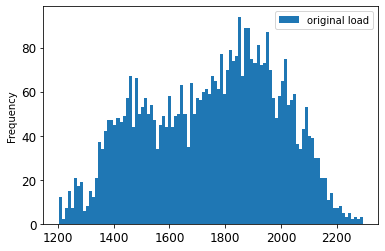

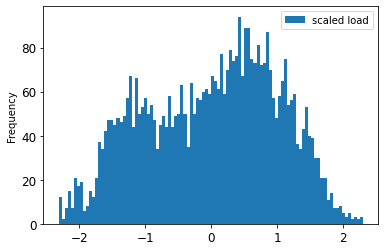

In [9]:
stlf_data[stlf_data.index <= 4416][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 4416][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

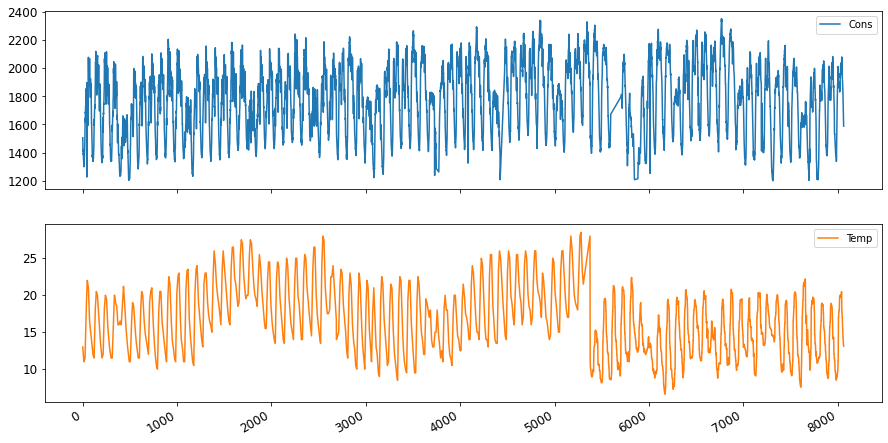

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+1'] = train_shifted['Cons'].shift(-1)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
0,-1.036660,-1.087449,1.453748,-1.660618,-0.031792,0.69585,-0.512899,0.263964,0.369556,-1.020331,-1.482019,-0.744600,-0.257371,-1.188616
1,-1.188616,-1.126681,1.478751,-1.660618,-0.031792,0.69585,-0.723968,0.019034,0.352659,-1.253722,-1.593980,-0.925464,-0.394668,-1.218163
2,-1.218163,-1.165913,1.503754,-1.660618,-0.031792,0.69585,-0.816838,-0.162552,0.466714,-1.187039,-1.784728,-0.974790,-0.544755,-1.446097
3,-1.446097,-1.205144,1.528757,-1.660618,-0.031792,0.69585,-0.892823,-0.373698,0.530078,-1.262057,-1.755701,-1.040559,-0.720796,-1.408108
4,-1.408108,-1.244376,1.553760,-1.516184,-0.031792,0.69585,-1.036350,-0.513055,0.263949,-1.307902,-1.805461,-1.180317,-0.869754,-1.530517
5,-1.530517,-1.283608,1.578763,-1.516184,-0.031792,0.69585,-1.188319,-0.724202,0.018942,-1.512119,-1.934008,-1.320075,-1.007804,-1.509412
6,-1.509412,-1.322839,1.603766,-1.516184,-0.031792,0.69585,-1.217869,-0.817106,-0.162702,-1.587137,-2.012795,-1.357070,-1.127798,-1.593832
7,-1.593832,-1.362071,1.628769,-1.516184,-0.031792,0.69585,-1.445823,-0.893119,-0.373915,-1.670491,-2.074996,-1.394065,-1.236507,-1.712020
8,-1.712020,-1.401303,1.653772,-1.371749,-0.031792,0.69585,-1.407831,-1.036699,-0.513316,-1.674659,-2.124756,-1.537934,-1.343336,-1.720462
9,-1.720462,-1.440535,1.678776,-1.371749,-0.031792,0.69585,-1.530251,-1.188724,-0.724529,-1.666323,-2.112316,-1.537934,-1.432109,-1.695136


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,-1.036660,-1.087449,1.453748,-1.660618,-0.031792,0.69585,-0.512899,0.263964,0.369556,-1.020331,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.036660
1,-1.188616,-1.126681,1.478751,-1.660618,-0.031792,0.69585,-0.723968,0.019034,0.352659,-1.253722,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.036660,-1.188616
2,-1.218163,-1.165913,1.503754,-1.660618,-0.031792,0.69585,-0.816838,-0.162552,0.466714,-1.187039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.036660,-1.188616,-1.218163
3,-1.446097,-1.205144,1.528757,-1.660618,-0.031792,0.69585,-0.892823,-0.373698,0.530078,-1.262057,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.036660,-1.188616,-1.218163,-1.446097
4,-1.408108,-1.244376,1.553760,-1.516184,-0.031792,0.69585,-1.036350,-0.513055,0.263949,-1.307902,...,NaN,NaN,NaN,NaN,NaN,-1.036660,-1.188616,-1.218163,-1.446097,-1.408108
5,-1.530517,-1.283608,1.578763,-1.516184,-0.031792,0.69585,-1.188319,-0.724202,0.018942,-1.512119,...,NaN,NaN,NaN,NaN,-1.036660,-1.188616,-1.218163,-1.446097,-1.408108,-1.530517
6,-1.509412,-1.322839,1.603766,-1.516184,-0.031792,0.69585,-1.217869,-0.817106,-0.162702,-1.587137,...,NaN,NaN,NaN,-1.036660,-1.188616,-1.218163,-1.446097,-1.408108,-1.530517,-1.509412
7,-1.593832,-1.362071,1.628769,-1.516184,-0.031792,0.69585,-1.445823,-0.893119,-0.373915,-1.670491,...,NaN,NaN,-1.036660,-1.188616,-1.218163,-1.446097,-1.408108,-1.530517,-1.509412,-1.593832
8,-1.712020,-1.401303,1.653772,-1.371749,-0.031792,0.69585,-1.407831,-1.036699,-0.513316,-1.674659,...,NaN,-1.036660,-1.188616,-1.218163,-1.446097,-1.408108,-1.530517,-1.509412,-1.593832,-1.712020
9,-1.720462,-1.440535,1.678776,-1.371749,-0.031792,0.69585,-1.530251,-1.188724,-0.724529,-1.666323,...,-1.03666,-1.188616,-1.218163,-1.446097,-1.408108,-1.530517,-1.509412,-1.593832,-1.712020,-1.720462


In [13]:
train_shifted = train_shifted.dropna(how='any')
train_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
10,-1.695136,-1.479766,1.703779,-1.371749,-0.031792,0.69585,-1.509144,-1.218285,-0.817463,-1.637150,...,-1.188616,-1.218163,-1.446097,-1.408108,-1.530517,-1.509412,-1.593832,-1.712020,-1.720462,-1.695136
11,-1.716241,-1.518998,1.728782,-1.371749,-0.031792,0.69585,-1.593572,-1.446323,-0.893500,-1.703833,...,-1.218163,-1.446097,-1.408108,-1.530517,-1.509412,-1.593832,-1.712020,-1.720462,-1.695136,-1.716241
12,-1.847092,-1.558230,1.753785,-1.227315,-0.031792,0.69585,-1.711770,-1.408317,-1.037125,-1.733007,...,-1.446097,-1.408108,-1.530517,-1.509412,-1.593832,-1.712020,-1.720462,-1.695136,-1.716241,-1.847092
13,-1.906186,-1.548422,1.753785,-1.227315,-0.031792,0.69585,-1.720213,-1.530782,-1.189199,-1.699665,...,-1.408108,-1.530517,-1.509412,-1.593832,-1.712020,-1.720462,-1.695136,-1.716241,-1.847092,-1.906186
14,-1.775335,-1.538614,1.753785,-1.227315,-0.031792,0.69585,-1.694885,-1.509667,-1.218769,-1.783019,...,-1.530517,-1.509412,-1.593832,-1.712020,-1.720462,-1.695136,-1.716241,-1.847092,-1.906186,-1.775335


In [14]:
train_shifted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4406 entries, 10 to 4415
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cons_original  4406 non-null   float64
 1   Temp           4406 non-null   float64
 2   Hum            4406 non-null   float64
 3   A              4406 non-null   float64
 4   B              4406 non-null   float64
 5   C              4406 non-null   float64
 6   D              4406 non-null   float64
 7   E              4406 non-null   float64
 8   F              4406 non-null   float64
 9   G              4406 non-null   float64
 10  H              4406 non-null   float64
 11  I              4406 non-null   float64
 12  J              4406 non-null   float64
 13  y_t+1          4406 non-null   float64
 14  Cons_t-10      4406 non-null   float64
 15  Cons_t-9       4406 non-null   float64
 16  Cons_t-8       4406 non-null   float64
 17  Cons_t-7       4406 non-null   float64
 18  Cons_t-

In [15]:
y_train = train_shifted[['y_t+1']]
y_train


,y_t+1
10,-1.716241
11,-1.847092
12,-1.906186
13,-1.775335
14,-1.745788
...,...
4411,-0.876262
4412,-0.990229
4413,-0.842494
4414,-0.876262


In [16]:
X_train = train_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
10,-1.695136,-1.695136,-1.720462,-1.712020,-1.593832,-1.509412,-1.530517,-1.408108,-1.446097,-1.218163,...,-1.371749,-0.031792,0.695850,-1.509144,-1.218285,-0.817463,-1.637150,-2.137196,-1.529713,-1.510350
11,-1.716241,-1.716241,-1.695136,-1.720462,-1.712020,-1.593832,-1.509412,-1.530517,-1.408108,-1.446097,...,-1.371749,-0.031792,0.695850,-1.593572,-1.446323,-0.893500,-1.703833,-2.112316,-1.616034,-1.583700
12,-1.847092,-1.847092,-1.716241,-1.695136,-1.720462,-1.712020,-1.593832,-1.509412,-1.530517,-1.408108,...,-1.227315,-0.031792,0.695850,-1.711770,-1.408317,-1.037125,-1.733007,-2.211836,-1.640697,-1.655923
13,-1.906186,-1.906186,-1.847092,-1.716241,-1.695136,-1.720462,-1.712020,-1.593832,-1.509412,-1.530517,...,-1.227315,-0.031792,0.695850,-1.720213,-1.530782,-1.189199,-1.699665,-2.274037,-1.669471,-1.719869
14,-1.775335,-1.775335,-1.906186,-1.847092,-1.716241,-1.695136,-1.720462,-1.712020,-1.593832,-1.509412,...,-1.227315,-0.031792,0.695850,-1.694885,-1.509667,-1.218769,-1.783019,-2.257450,-1.620144,-1.769522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4411,-0.791842,-0.791842,-0.597676,-0.551245,-0.399288,-0.357078,-0.255774,-0.728527,-0.629333,-0.530139,...,1.516936,-1.504799,-1.437092,-0.356708,-0.529947,-0.133132,-0.028419,-0.067999,0.258370,-0.514098
4412,-0.876262,-0.876262,-0.791842,-0.597676,-0.551245,-0.399288,-0.357078,-0.255774,-0.728527,-0.629333,...,1.661370,-1.504799,-1.437092,-0.398922,-0.629186,-0.175375,-0.245140,-0.308507,0.007628,-0.576540
4413,-0.990229,-0.990229,-0.876262,-0.791842,-0.597676,-0.551245,-0.399288,-0.357078,-0.255774,-0.728527,...,1.661370,-1.504799,-1.437092,-0.550891,-0.728425,-0.310551,-0.324326,-0.300214,-0.222562,-0.637101
4414,-0.842494,-0.842494,-0.990229,-0.876262,-0.791842,-0.597676,-0.551245,-0.399288,-0.357078,-0.255774,...,1.661370,-1.504799,-1.437092,-0.597326,-0.255456,-0.445728,-0.157618,-0.105319,-0.160904,-0.672460


In [17]:
X_train=np.atleast_3d(X_train)
X_train.shape

(4406, 24, 1)

In [18]:

#subsequences=2
#timesteps=X_train.shape[1]//subsequences
X_train=X_train.reshape(4406,2,1,12)
#print(X_train.shape)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=4417) & (stlf_data.index <5377)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4417,1451.0,25.916667,37.250000,1.0,2.0,0.0,1516.0,1620.0,1578.0,1618.0,1615.0,1606.0,1573.166667
4418,1440.0,25.833333,38.500000,1.0,2.0,0.0,1551.0,1609.0,1690.0,1613.0,1603.0,1581.0,1552.333333
4419,1441.0,25.750000,39.750000,1.0,2.0,0.0,1543.0,1563.0,1666.0,1603.0,1571.0,1556.0,1533.583333
4420,1409.0,25.666667,41.000000,2.0,2.0,0.0,1470.0,1543.0,1656.0,1574.0,1553.0,1522.0,1513.000000
4421,1405.0,25.583333,42.250000,2.0,2.0,0.0,1451.0,1516.0,1620.0,1551.0,1508.0,1512.0,1495.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372,1907.0,27.725352,36.478873,24.0,4.0,1.0,2007.0,1931.0,2064.0,1887.0,1825.0,1674.0,1979.083333
5373,1882.0,27.816901,35.985915,24.0,4.0,1.0,1958.0,1969.0,2014.0,1841.0,1817.0,1622.0,1968.083333
5374,1895.0,27.908451,35.492958,24.0,4.0,1.0,1984.0,2021.0,1997.0,1864.0,1839.0,1636.0,1959.583333
5375,1898.0,28.000000,35.000000,24.0,4.0,1.0,1953.0,2036.0,1972.0,1837.0,1810.0,1626.0,1953.416667


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4417,-1.805903,1.313189,-1.792174,-1.661325,-0.950805,-1.531322,-1.522759,-1.081513,-1.247760,-0.982646,-0.956674,-0.996036,-1.348253
4418,-1.851785,1.290810,-1.699900,-1.661325,-0.950805,-1.531322,-1.377370,-1.127080,-0.784505,-1.003700,-1.006725,-1.099167,-1.439207
4419,-1.847614,1.268432,-1.607626,-1.661325,-0.950805,-1.531322,-1.410602,-1.317634,-0.883774,-1.045808,-1.140194,-1.202298,-1.521064
4420,-1.981089,1.246053,-1.515352,-1.516862,-0.950805,-1.531322,-1.713842,-1.400484,-0.925136,-1.167921,-1.215271,-1.342557,-1.610926
4421,-1.997774,1.223675,-1.423078,-1.516862,-0.950805,-1.531322,-1.792767,-1.512331,-1.074039,-1.264769,-1.402963,-1.383810,-1.689146
4422,-2.114564,1.201296,-1.330804,-1.516862,-0.950805,-1.531322,-1.838461,-1.367344,-1.119538,-1.344774,-1.411305,-1.453939,-1.773550
4423,-2.823651,1.178918,-1.238529,-1.516862,-0.950805,-1.531322,-1.834307,-1.400484,-1.309803,-1.370038,-1.386279,-1.462189,-1.903068
4424,-2.755849,1.156539,-1.146255,-1.372399,-0.950805,-1.531322,-1.967234,-1.702885,-1.392527,-1.424779,-1.473868,-1.503442,-2.019395
4425,-2.688046,1.134161,-1.053981,-1.372399,-0.950805,-1.531322,-1.983850,-1.781593,-1.504205,-1.487940,-1.478039,-1.499317,-2.119985
4426,-2.620244,1.111782,-0.961707,-1.372399,-0.950805,-1.531322,-2.100161,-1.827160,-1.359438,-1.513205,-1.494723,-1.511692,-2.227395


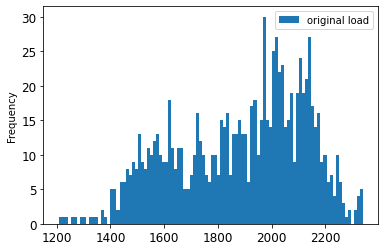

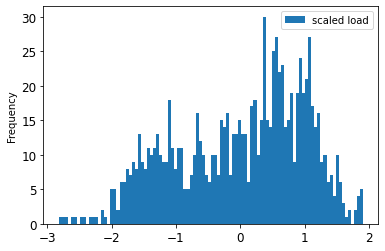

In [21]:
stlf_data[(stlf_data.index >=4417) & (stlf_data.index <=5377)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=4417) & (valid.index <=5377)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+1'] = valid_shifted['Cons'].shift(-1)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4417,-1.805903,1.313189,-1.792174,-1.661325,-0.950805,-1.531322,-1.522759,-1.081513,-1.247760,-0.982646,-0.956674,-0.996036,-1.348253,-1.851785
4418,-1.851785,1.290810,-1.699900,-1.661325,-0.950805,-1.531322,-1.377370,-1.127080,-0.784505,-1.003700,-1.006725,-1.099167,-1.439207,-1.847614
4419,-1.847614,1.268432,-1.607626,-1.661325,-0.950805,-1.531322,-1.410602,-1.317634,-0.883774,-1.045808,-1.140194,-1.202298,-1.521064,-1.981089
4420,-1.981089,1.246053,-1.515352,-1.516862,-0.950805,-1.531322,-1.713842,-1.400484,-0.925136,-1.167921,-1.215271,-1.342557,-1.610926,-1.997774
4421,-1.997774,1.223675,-1.423078,-1.516862,-0.950805,-1.531322,-1.792767,-1.512331,-1.074039,-1.264769,-1.402963,-1.383810,-1.689146,-2.114564
4422,-2.114564,1.201296,-1.330804,-1.516862,-0.950805,-1.531322,-1.838461,-1.367344,-1.119538,-1.344774,-1.411305,-1.453939,-1.773550,-2.823651
4423,-2.823651,1.178918,-1.238529,-1.516862,-0.950805,-1.531322,-1.834307,-1.400484,-1.309803,-1.370038,-1.386279,-1.462189,-1.903068,-2.755849
4424,-2.755849,1.156539,-1.146255,-1.372399,-0.950805,-1.531322,-1.967234,-1.702885,-1.392527,-1.424779,-1.473868,-1.503442,-2.019395,-2.688046
4425,-2.688046,1.134161,-1.053981,-1.372399,-0.950805,-1.531322,-1.983850,-1.781593,-1.504205,-1.487940,-1.478039,-1.499317,-2.119985,-2.620244
4426,-2.620244,1.111782,-0.961707,-1.372399,-0.950805,-1.531322,-2.100161,-1.827160,-1.359438,-1.513205,-1.494723,-1.511692,-2.227395,-2.552441


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
4417,-1.805903,1.313189,-1.792174,-1.661325,-0.950805,-1.531322,-1.522759,-1.081513,-1.247760,-0.982646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.805903
4418,-1.851785,1.290810,-1.699900,-1.661325,-0.950805,-1.531322,-1.377370,-1.127080,-0.784505,-1.003700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.805903,-1.851785
4419,-1.847614,1.268432,-1.607626,-1.661325,-0.950805,-1.531322,-1.410602,-1.317634,-0.883774,-1.045808,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.805903,-1.851785,-1.847614
4420,-1.981089,1.246053,-1.515352,-1.516862,-0.950805,-1.531322,-1.713842,-1.400484,-0.925136,-1.167921,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.805903,-1.851785,-1.847614,-1.981089
4421,-1.997774,1.223675,-1.423078,-1.516862,-0.950805,-1.531322,-1.792767,-1.512331,-1.074039,-1.264769,...,NaN,NaN,NaN,NaN,NaN,-1.805903,-1.851785,-1.847614,-1.981089,-1.997774
4422,-2.114564,1.201296,-1.330804,-1.516862,-0.950805,-1.531322,-1.838461,-1.367344,-1.119538,-1.344774,...,NaN,NaN,NaN,NaN,-1.805903,-1.851785,-1.847614,-1.981089,-1.997774,-2.114564
4423,-2.823651,1.178918,-1.238529,-1.516862,-0.950805,-1.531322,-1.834307,-1.400484,-1.309803,-1.370038,...,NaN,NaN,NaN,-1.805903,-1.851785,-1.847614,-1.981089,-1.997774,-2.114564,-2.823651
4424,-2.755849,1.156539,-1.146255,-1.372399,-0.950805,-1.531322,-1.967234,-1.702885,-1.392527,-1.424779,...,NaN,NaN,-1.805903,-1.851785,-1.847614,-1.981089,-1.997774,-2.114564,-2.823651,-2.755849
4425,-2.688046,1.134161,-1.053981,-1.372399,-0.950805,-1.531322,-1.983850,-1.781593,-1.504205,-1.487940,...,NaN,-1.805903,-1.851785,-1.847614,-1.981089,-1.997774,-2.114564,-2.823651,-2.755849,-2.688046
4426,-2.620244,1.111782,-0.961707,-1.372399,-0.950805,-1.531322,-2.100161,-1.827160,-1.359438,-1.513205,...,-1.805903,-1.851785,-1.847614,-1.981089,-1.997774,-2.114564,-2.823651,-2.755849,-2.688046,-2.620244


In [24]:
valid_shifted = valid_shifted.dropna(how='any')
valid_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
4427,-2.552441,1.089404,-0.869433,-1.372399,-0.950805,-1.531322,-2.806336,-1.823018,-1.392527,-1.567945,...,-1.851785,-1.847614,-1.981089,-1.997774,-2.114564,-2.823651,-2.755849,-2.688046,-2.620244,-2.552441
4428,-2.484639,1.067025,-0.777159,-1.227936,-0.950805,-1.531322,-2.738812,-1.955577,-1.694470,-1.614264,...,-1.847614,-1.981089,-1.997774,-2.114564,-2.823651,-2.755849,-2.688046,-2.620244,-2.552441,-2.484639
4429,-2.416836,0.999889,-0.697188,-1.227936,-0.950805,-1.531322,-2.671288,-1.972147,-1.773058,-1.732166,...,-1.981089,-1.997774,-2.114564,-2.823651,-2.755849,-2.688046,-2.620244,-2.552441,-2.484639,-2.416836
4430,-2.349033,0.932754,-0.617217,-1.227936,-0.950805,-1.531322,-2.603764,-2.088137,-1.818556,-1.791117,...,-1.997774,-2.114564,-2.823651,-2.755849,-2.688046,-2.620244,-2.552441,-2.484639,-2.416836,-2.349033
4431,-2.281231,0.865618,-0.537246,-1.227936,-0.950805,-1.531322,-2.536240,-2.792359,-1.814420,-1.749009,...,-2.114564,-2.823651,-2.755849,-2.688046,-2.620244,-2.552441,-2.484639,-2.416836,-2.349033,-2.281231


In [25]:
y_valid = valid_shifted[['y_t+1']]
y_valid


,y_t+1
4427,-2.484639
4428,-2.416836
4429,-2.349033
4430,-2.281231
4431,-2.213428
...,...
5371,0.096118
5372,-0.008160
5373,0.046065
5374,0.058578


In [26]:
X_valid = valid_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
4427,-2.552441,-2.552441,-2.620244,-2.688046,-2.755849,-2.823651,-2.114564,-1.997774,-1.981089,-1.847614,...,-1.372399,-0.950805,-1.531322,-2.806336,-1.823018,-1.392527,-1.567945,-1.478039,-1.610698,-2.325981
4428,-2.484639,-2.484639,-2.552441,-2.620244,-2.688046,-2.755849,-2.823651,-2.114564,-1.997774,-1.981089,...,-1.227936,-0.950805,-1.531322,-2.738812,-1.955577,-1.694470,-1.614264,-1.557287,-1.656076,-2.392094
4429,-2.416836,-2.416836,-2.484639,-2.552441,-2.620244,-2.688046,-2.755849,-2.823651,-2.114564,-1.997774,...,-1.227936,-0.950805,-1.531322,-2.671288,-1.972147,-1.773058,-1.732166,-1.657389,-1.759207,-2.445381
4430,-2.349033,-2.349033,-2.416836,-2.484639,-2.552441,-2.620244,-2.688046,-2.755849,-2.823651,-2.114564,...,-1.227936,-0.950805,-1.531322,-2.603764,-2.088137,-1.818556,-1.791117,-1.715782,-1.738581,-2.488752
4431,-2.281231,-2.281231,-2.349033,-2.416836,-2.484639,-2.552441,-2.620244,-2.688046,-2.755849,-2.823651,...,-1.227936,-0.950805,-1.531322,-2.536240,-2.792359,-1.814420,-1.749009,-1.740808,-1.734456,-2.526573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5371,0.287988,0.287988,0.417292,0.308844,0.513228,0.634189,0.571623,0.354726,0.196224,0.367239,...,1.516862,0.165054,0.653030,0.637306,0.376643,0.807935,0.326908,0.098571,-0.529882,0.480997
5372,0.096118,0.096118,0.287988,0.417292,0.308844,0.513228,0.634189,0.571623,0.354726,0.196224,...,1.661325,0.165054,0.653030,0.516841,0.206801,0.762436,0.150055,-0.080779,-0.715519,0.423879
5373,-0.008160,-0.008160,0.096118,0.287988,0.417292,0.308844,0.513228,0.634189,0.571623,0.354726,...,1.661325,0.165054,0.653030,0.313296,0.364215,0.555626,-0.043641,-0.114147,-0.930032,0.375855
5374,0.046065,0.046065,-0.008160,0.096118,0.287988,0.417292,0.308844,0.513228,0.634189,0.571623,...,1.661325,0.165054,0.653030,0.421299,0.579624,0.485311,0.053207,-0.022386,-0.872278,0.338746


In [27]:
X_valid=np.atleast_3d(X_valid)
X_valid.shape

(949, 24, 1)

In [28]:
#subsequences=2
#X_valid=X_valid.shape[1]//subsequences
X_valid=X_valid.reshape(949,2,1,12)
print(X_valid.shape)

(949, 2, 1, 12)


In [29]:
#from keras.layers import RepeatVector
from keras.layers import BatchNormalization
from keras.layers import Input

model = models.Sequential()
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu'),input_shape=(None,1,12)))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
#model.add(TimeDistributed(MaxPooling1D(pool_size=2,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Flatten()))
#model.add(RepeatVector(5629))
model.add((LSTM(128,activation='linear')))
#model.add(Flatten())
#model.add(GRU(300))
#model.add(Dense(150,activation='linear'))
#model.add(Dense(75,activation='linear'))
#model.add(Dropout(0.1))
#model.add(Bidirectional(LSTM(300)))
model.add(Dense(1,activation='linear'))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.005)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 1, 128)      1664      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 1, 128)      16512     
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 1, 128)      0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 128)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 149,889
Trainable params: 149,889
Non-trainable params: 0
__________________________________________________

In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:

history = model.fit(X_train,
          y_train,
          batch_size=300,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=[earlystop],
          )


Epoch 1/300
15/15 [==============================] - 1s 62ms/step - loss: 0.2351 - val_loss: 0.0606
Epoch 2/300
15/15 [==============================] - 0s 25ms/step - loss: 0.0669 - val_loss: 0.0328
Epoch 3/300
15/15 [==============================] - 0s 21ms/step - loss: 0.0418 - val_loss: 0.0209
Epoch 4/300
15/15 [==============================] - 0s 22ms/step - loss: 0.0367 - val_loss: 0.0192
Epoch 5/300
15/15 [==============================] - 0s 23ms/step - loss: 0.0338 - val_loss: 0.0206
Epoch 6/300
15/15 [==============================] - 0s 21ms/step - loss: 0.0308 - val_loss: 0.0183
Epoch 7/300
15/15 [==============================] - 0s 21ms/step - loss: 0.0301 - val_loss: 0.0209
Epoch 8/300
15/15 [==============================] - 0s 21ms/step - loss: 0.0285 - val_loss: 0.0182
Epoch 9/300
15/15 [==============================] - 0s 21ms/step - loss: 0.0272 - val_loss: 0.0193
Epoch 10/300
15/15 [==============================] - 0s 21ms/step - loss: 0.0270 - val_loss: 0.0206

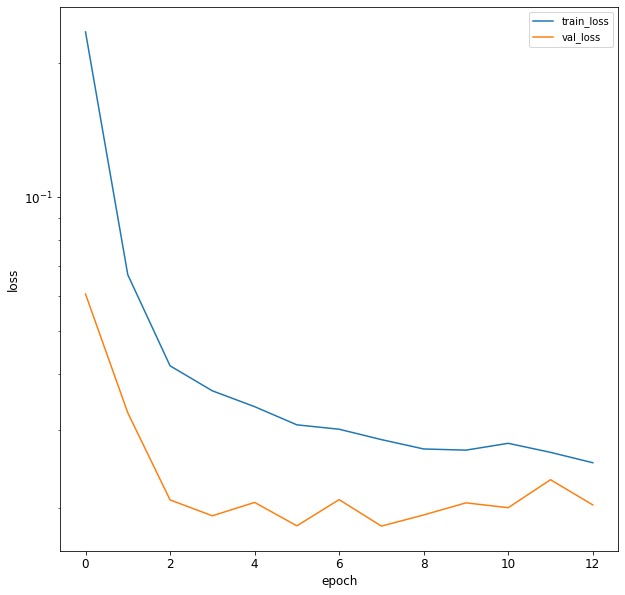

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[stlf_data.index >= 5378][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5378,1538.0,10.577452,90.370747,1.0,6.0,1.0,1667.0,1838.0,1919.0,1588.0,1551.0,1614.0,1733.250000
5379,1502.0,10.112452,91.004930,1.0,6.0,1.0,1660.0,1811.0,1903.0,1578.0,1550.0,1596.0,1699.833333
5380,1515.0,10.112452,91.004930,2.0,6.0,1.0,1585.0,1765.0,1891.0,1548.0,1491.0,1575.0,1668.500000
5381,1521.0,10.112452,91.004930,2.0,6.0,1.0,1565.0,1730.0,1846.0,1531.0,1501.0,1537.0,1641.416667
5382,1498.0,9.962452,91.334265,2.0,6.0,1.0,1538.0,1667.0,1838.0,1502.0,1513.0,1548.0,1613.083333
5383,1487.0,9.812452,91.663600,2.0,6.0,1.0,1502.0,1660.0,1811.0,1498.0,1508.0,1542.0,1586.083333
5384,1441.0,9.812452,91.663600,3.0,6.0,1.0,1515.0,1585.0,1765.0,1493.0,1498.0,1518.0,1559.083333
5385,1437.0,9.812452,91.663600,3.0,6.0,1.0,1521.0,1565.0,1730.0,1469.0,1480.0,1503.0,1534.666667
5386,1434.0,9.532452,90.961965,3.0,6.0,1.0,1498.0,1538.0,1667.0,1447.0,1439.0,1495.0,1515.250000
5387,1431.0,9.252452,90.260330,3.0,6.0,1.0,1487.0,1502.0,1660.0,1440.0,1419.0,1492.0,1496.166667


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2686 entries, 5378 to 8063
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    2686 non-null   float64
 1   Temp    2686 non-null   float64
 2   Hum     2686 non-null   float64
 3   A       2686 non-null   float64
 4   B       2686 non-null   float64
 5   C       2686 non-null   float64
 6   D       2686 non-null   float64
 7   E       2686 non-null   float64
 8   F       2686 non-null   float64
 9   G       2686 non-null   float64
 10  H       2686 non-null   float64
 11  I       2686 non-null   float64
 12  J       2686 non-null   float64
dtypes: float64(13)
memory usage: 293.8 KB


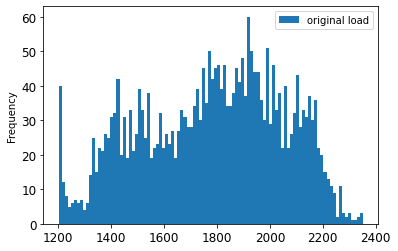

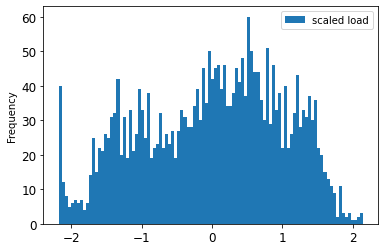

In [36]:
stlf_data[stlf_data.index >= 5378][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[test.index >=5378][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+1'] = test_shifted['Cons'].shift(-1)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5378,-0.912029,-1.000315,0.764248,-1.663654,1.000745,0.688625,-0.427119,0.215299,0.519501,-0.728171,-0.876685,-0.673685,-0.185889,-1.047317
5379,-1.047317,-1.127160,0.802428,-1.663654,1.000745,0.688625,-0.453424,0.113839,0.459380,-0.765614,-0.880384,-0.740655,-0.316827,-0.998463
5380,-0.998463,-1.127160,0.802428,-1.519096,1.000745,0.688625,-0.735255,-0.059019,0.414289,-0.877946,-1.098633,-0.818787,-0.439602,-0.975915
5381,-0.975915,-1.127160,0.802428,-1.519096,1.000745,0.688625,-0.810410,-0.190542,0.245198,-0.941600,-1.061642,-0.960169,-0.545724,-1.062349
5382,-1.062349,-1.168078,0.822255,-1.519096,1.000745,0.688625,-0.911869,-0.427282,0.215138,-1.050187,-1.017252,-0.919242,-0.656744,-1.103687
5383,-1.103687,-1.208996,0.842083,-1.519096,1.000745,0.688625,-1.047149,-0.453586,0.113684,-1.065164,-1.035748,-0.941566,-0.762540,-1.276555
5384,-1.276555,-1.208996,0.842083,-1.374538,1.000745,0.688625,-0.998298,-0.735420,-0.059164,-1.083886,-1.072740,-1.030859,-0.868335,-1.291587
5385,-1.291587,-1.208996,0.842083,-1.374538,1.000745,0.688625,-0.975751,-0.810576,-0.190679,-1.173751,-1.139324,-1.086668,-0.964009,-1.302861
5386,-1.302861,-1.285376,0.799841,-1.374538,1.000745,0.688625,-1.062180,-0.912036,-0.427405,-1.256127,-1.290989,-1.116432,-1.040090,-1.314135
5387,-1.314135,-1.361756,0.757600,-1.374538,1.000745,0.688625,-1.103515,-1.047316,-0.453708,-1.282338,-1.364971,-1.127594,-1.114865,-1.374263


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
5378,-0.912029,-1.000315,0.764248,-1.663654,1.000745,0.688625,-0.427119,0.215299,0.519501,-0.728171,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.912029
5379,-1.047317,-1.127160,0.802428,-1.663654,1.000745,0.688625,-0.453424,0.113839,0.459380,-0.765614,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.912029,-1.047317
5380,-0.998463,-1.127160,0.802428,-1.519096,1.000745,0.688625,-0.735255,-0.059019,0.414289,-0.877946,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.912029,-1.047317,-0.998463
5381,-0.975915,-1.127160,0.802428,-1.519096,1.000745,0.688625,-0.810410,-0.190542,0.245198,-0.941600,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.912029,-1.047317,-0.998463,-0.975915
5382,-1.062349,-1.168078,0.822255,-1.519096,1.000745,0.688625,-0.911869,-0.427282,0.215138,-1.050187,...,NaN,NaN,NaN,NaN,NaN,-0.912029,-1.047317,-0.998463,-0.975915,-1.062349
5383,-1.103687,-1.208996,0.842083,-1.519096,1.000745,0.688625,-1.047149,-0.453586,0.113684,-1.065164,...,NaN,NaN,NaN,NaN,-0.912029,-1.047317,-0.998463,-0.975915,-1.062349,-1.103687
5384,-1.276555,-1.208996,0.842083,-1.374538,1.000745,0.688625,-0.998298,-0.735420,-0.059164,-1.083886,...,NaN,NaN,NaN,-0.912029,-1.047317,-0.998463,-0.975915,-1.062349,-1.103687,-1.276555
5385,-1.291587,-1.208996,0.842083,-1.374538,1.000745,0.688625,-0.975751,-0.810576,-0.190679,-1.173751,...,NaN,NaN,-0.912029,-1.047317,-0.998463,-0.975915,-1.062349,-1.103687,-1.276555,-1.291587
5386,-1.302861,-1.285376,0.799841,-1.374538,1.000745,0.688625,-1.062180,-0.912036,-0.427405,-1.256127,...,NaN,-0.912029,-1.047317,-0.998463,-0.975915,-1.062349,-1.103687,-1.276555,-1.291587,-1.302861
5387,-1.314135,-1.361756,0.757600,-1.374538,1.000745,0.688625,-1.103515,-1.047316,-0.453708,-1.282338,...,-0.912029,-1.047317,-0.998463,-0.975915,-1.062349,-1.103687,-1.276555,-1.291587,-1.302861,-1.314135


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
5388,-1.374263,-1.361756,0.757600,-1.229980,1.000745,0.688625,-1.276372,-0.998465,-0.735525,-1.353481,...,-1.047317,-0.998463,-0.975915,-1.062349,-1.103687,-1.276555,-1.291587,-1.302861,-1.314135,-1.374263
5389,-1.396811,-1.361756,0.757600,-1.229980,1.000745,0.688625,-1.291403,-0.975918,-0.810677,-1.578144,...,-0.998463,-0.975915,-1.062349,-1.103687,-1.276555,-1.291587,-1.302861,-1.314135,-1.374263,-1.396811
5390,-1.415601,-1.398582,0.749516,-1.229980,1.000745,0.688625,-1.302676,-1.062347,-0.912131,-1.634309,...,-0.975915,-1.062349,-1.103687,-1.276555,-1.291587,-1.302861,-1.314135,-1.374263,-1.396811,-1.415601
5391,-1.449423,-1.435409,0.741432,-1.229980,1.000745,0.688625,-1.313949,-1.103683,-1.047403,-1.589377,...,-1.062349,-1.103687,-1.276555,-1.291587,-1.302861,-1.314135,-1.374263,-1.396811,-1.415601,-1.449423
5392,-1.393053,-1.435409,0.741432,-1.085422,1.000745,0.688625,-1.374073,-1.276541,-0.998555,-1.660520,...,-1.103687,-1.276555,-1.291587,-1.302861,-1.314135,-1.374263,-1.396811,-1.415601,-1.449423,-1.393053


In [40]:
y_test = test_shifted[['y_t+1']]
y_test

,y_t+1
5388,-1.396811
5389,-1.415601
5390,-1.449423
5391,-1.393053
5392,-1.347957
...,...
8058,-0.352087
8059,-0.404699
8060,-0.431005
8061,-0.600115


In [41]:
X_test = test_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
5388,-1.374263,-1.374263,-1.314135,-1.302861,-1.291587,-1.276555,-1.103687,-1.062349,-0.975915,-0.998463,...,-1.229980,1.000745,0.688625,-1.276372,-0.998465,-0.735525,-1.353481,-1.350175,-1.146197,-1.170375
5389,-1.396811,-1.396811,-1.374263,-1.314135,-1.302861,-1.291587,-1.276555,-1.103687,-1.062349,-0.975915,...,-1.229980,1.000745,0.688625,-1.291403,-0.975918,-0.810677,-1.578144,-1.294688,-1.172241,-1.221314
5390,-1.415601,-1.415601,-1.396811,-1.374263,-1.314135,-1.302861,-1.291587,-1.276555,-1.103687,-1.062349,...,-1.229980,1.000745,0.688625,-1.302676,-1.062347,-0.912131,-1.634309,-1.272493,-1.257814,-1.265069
5391,-1.449423,-1.449423,-1.415601,-1.396811,-1.374263,-1.314135,-1.302861,-1.291587,-1.276555,-1.103687,...,-1.229980,1.000745,0.688625,-1.313949,-1.103683,-1.047403,-1.589377,-1.272493,-1.190844,-1.300007
5392,-1.393053,-1.393053,-1.449423,-1.415601,-1.396811,-1.374263,-1.314135,-1.302861,-1.291587,-1.276555,...,-1.085422,1.000745,0.688625,-1.374073,-1.276541,-0.998555,-1.660520,-1.217006,-1.202005,-1.334293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8058,-0.058963,-0.058963,-0.040173,0.102631,0.211613,0.309321,0.354417,0.365691,0.440851,0.527285,...,1.516620,0.500745,0.688625,0.309401,0.527195,0.970408,-0.136560,-0.099866,-0.558347,0.373456
8059,-0.352087,-0.352087,-0.058963,-0.040173,0.102631,0.211613,0.309321,0.354417,0.365691,0.440851,...,1.516620,0.500745,0.688625,0.211699,0.440766,0.793803,-0.226425,-0.184947,-0.766699,0.273865
8060,-0.404699,-0.404699,-0.352087,-0.058963,-0.040173,0.102631,0.211613,0.309321,0.354417,0.365691,...,1.661178,0.500745,0.688625,0.102724,0.365610,0.729924,-0.368711,-0.295921,-0.956448,0.175253
8061,-0.431005,-0.431005,-0.404699,-0.352087,-0.058963,-0.040173,0.102631,0.211613,0.309321,0.354417,...,1.661178,0.500745,0.688625,-0.040071,0.354337,0.560834,-0.754381,-0.454984,-1.436401,0.089049


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2675, 24, 1)

In [43]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2675, 24, 1)

In [44]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(2675,2,1,12)

In [45]:
predictions = model.predict(X_test)
predictions

array([[-1.4031215 ],
       [-1.4422363 ],
       [-1.4665977 ],
       ...,
       [-0.56758875],
       [-0.63280714],
       [-0.7424245 ]], dtype=float32)

In [46]:
feature=stlf_data.copy()[stlf_data.index >= 5378][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    1780.689873
dtype: float64
Cons    266.148526
dtype: float64


In [47]:
load_mean=1780.689873
load_std=266.148526
rescaled_target_load=(y_test*load_std)+load_mean
rescaled_target_load

,y_t+1
5388,1408.930791
5389,1403.929860
5390,1394.928184
5391,1409.930977
5392,1421.933211
...,...
8058,1686.982554
8059,1672.979948
8060,1665.978644
8061,1620.970265


In [48]:
rescaled_predicted_load=(predictions*load_std)+load_mean
rescaled_predicted_load

array([[1407.2511],
       [1396.8408],
       [1390.3569],
       ...,
       [1629.627 ],
       [1612.2692],
       [1583.0946]], dtype=float32)

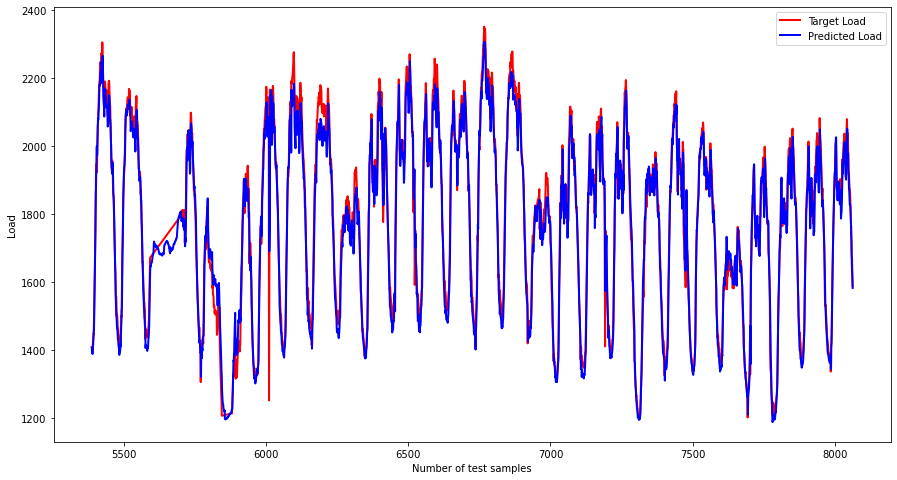

In [49]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [50]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

1.9287405116930705


In [51]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+1    0.843799
dtype: float64


In [52]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

              y_t+1
5388  140793.198281
5389  140293.490906
5390  139393.146088
5391  140894.606699
5392  142094.549533
...             ...
8058  168596.202596
8059  167199.018779
8060  166500.046426
8061  161997.563304
8062  158696.718709

[2675 rows x 1 columns]


In [53]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

            y_t+1
5388     2.821365
5389    50.254478
5390    20.896329
5391   452.671138
5392   305.101217
...           ...
8058  1199.321058
8059   293.490313
8060  1321.445447
8061    75.709144
8062    23.712187

[2675 rows x 1 columns]
y_t+1    2197.893414
dtype: float64


In [54]:
RMSE=MSE**0.5
print(RMSE)

y_t+1    46.881696
dtype: float64


In [55]:
a=np.array(rescaled_predicted_load)

In [56]:
for i in  range(0,2675):
    b=a[i]
    print(b)

[1407.2511]
[1396.8408]
[1390.3569]
[1388.6549]
[1404.4661]
[1415.4958]
[1432.2998]
[1453.8567]
[1464.381]
[1520.5922]
[1564.0438]
[1634.1254]
[1669.8654]
[1744.7026]
[1847.2723]
[1917.3323]
[1928.4648]
[1994.402]
[2000.5151]
[1974.4784]
[2008.3885]
[2049.7236]
[2083.1697]
[2078.0183]
[2102.5425]
[2110.7234]
[2138.8933]
[2179.5115]
[2178.389]
[2186.5393]
[2214.3572]
[2217.0403]
[2223.7197]
[2185.33]
[2248.552]
[2240.4595]
[2236.08]
[2251.9153]
[2266.6746]
[2255.8406]
[2189.6753]
[2145.3323]
[2128.168]
[2118.0818]
[2087.6372]
[2135.3257]
[2160.4695]
[2169.8054]
[2166.4888]
[2148.6274]
[2116.918]
[2114.3]
[2113.5713]
[2119.1643]
[2121.3013]
[2110.52]
[2058.134]
[2061.3262]
[2063.9023]
[2132.1567]
[2144.8982]
[2149.941]
[2146.0815]
[2126.5955]
[2078.8489]
[2077.589]
[2062.963]
[2023.6653]
[2002.1066]
[1960.2217]
[1935.5713]
[1934.3807]
[1918.7373]
[1952.4346]
[1933.5952]
[1908.3513]
[1862.3217]
[1848.8359]
[1824.9395]
[1778.7621]
[1726.412]
[1694.0145]
[1651.3784]
[1624.021]
[1568.219]
[1

[2066.0679]
[2081.7297]
[2097.8022]
[2049.6243]
[2047.2776]
[2033.9404]
[2105.0017]
[2056.2327]
[2054.636]
[2057.3054]
[2045.1387]
[2053.9932]
[1979.8689]
[1994.5243]
[2032.7284]
[2073.2642]
[2097.2065]
[2127.4358]
[2110.4492]
[2087.5977]
[2055.6704]
[2072.8435]
[2020.8096]
[1995.3406]
[1981.5966]
[1954.329]
[1941.9897]
[1918.8901]
[1904.5349]
[1913.7085]
[1888.9448]
[1868.045]
[1821.0715]
[1820.1239]
[1776.614]
[1736.2059]
[1704.9277]
[1667.2583]
[1641.9923]
[1564.3777]
[1558.438]
[1539.7405]
[1502.9617]
[1528.5168]
[1491.6398]
[1483.5515]
[1488.3638]
[1465.3887]
[1459.6221]
[1455.1835]
[1448.184]
[1452.0406]
[1438.8715]
[1436.9556]
[1432.8556]
[1439.7662]
[1451.4016]
[1404.2976]
[1447.9098]
[1480.2968]
[1494.8854]
[1565.0881]
[1599.4994]
[1649.8533]
[1710.3063]
[1735.9028]
[1804.582]
[1848.7225]
[1869.019]
[1904.3997]
[1918.6777]
[1911.2494]
[1893.3889]
[1968.48]
[2001.018]
[2033.6156]
[2021.8727]
[2023.3259]
[2035.8989]
[2048.2646]
[2038.5203]
[2066.4617]
[2049.0483]
[2055.7754]
[20

[1712.3323]
[1654.2816]
[1625.9102]
[1590.7445]
[1568.228]
[1562.3129]
[1547.5295]
[1542.9795]
[1533.3451]
[1497.3862]
[1424.6348]
[1451.8298]
[1434.6606]
[1441.0618]
[1455.383]
[1455.609]
[1439.0255]
[1438.792]
[1442.5522]
[1468.8816]
[1464.4845]
[1490.0513]
[1506.688]
[1552.2885]
[1630.9563]
[1656.3013]
[1679.4197]
[1698.9448]
[1711.6194]
[1688.9967]
[1708.3584]
[1721.7909]
[1746.071]
[1767.5671]
[1775.4259]
[1802.3641]
[1816.442]
[1824.387]
[1806.0685]
[1780.1594]
[1785.7278]
[1782.6578]
[1780.2094]
[1816.1423]
[1816.6624]
[1819.9519]
[1829.7192]
[1824.7491]
[1821.5488]
[1826.5134]
[1840.6538]
[1842.7535]
[1751.7087]
[1763.5448]
[1726.9543]
[1782.915]
[1813.1094]
[1758.2733]
[1752.2499]
[1734.7268]
[1708.8048]
[1728.9996]
[1736.515]
[1726.2032]
[1743.2961]
[1753.7776]
[1764.8381]
[1772.3212]
[1766.484]
[1748.4034]
[1748.5571]
[1769.8647]
[1790.4095]
[1808.8412]
[1839.0626]
[1842.8405]
[1849.7213]
[1829.4415]
[1823.8281]
[1849.7896]
[1835.1033]
[1825.808]
[1795.8604]
[1793.6125]
[179

[1587.1501]
[1556.213]
[1529.9886]
[1503.5679]
[1479.3623]
[1470.7063]
[1400.9941]
[1391.451]
[1368.6523]
[1350.7982]
[1339.0154]
[1321.4171]
[1312.7903]
[1311.9622]
[1302.1914]
[1287.7225]
[1282.528]
[1263.2495]
[1269.8276]
[1271.83]
[1210.3634]
[1264.1521]
[1271.2341]
[1281.5762]
[1292.8923]
[1310.4792]
[1331.873]
[1379.9058]
[1471.7755]
[1358.7987]
[1537.0258]
[1639.3135]
[1663.5022]
[1727.4906]
[1769.6843]
[1805.5222]
[1840.3911]
[1857.4819]
[1840.0652]
[1877.8516]
[1917.9907]
[1945.539]
[1947.0413]
[1876.3269]
[1803.8204]
[1776.9005]
[1729.9333]
[1739.846]
[1723.8009]
[1705.5631]
[1730.0581]
[1760.4586]
[1772.9856]
[1795.6161]
[1770.5251]
[1764.1602]
[1768.8196]
[1753.6649]
[1717.5764]
[1685.6782]
[1685.7954]
[1677.1423]
[1707.9341]
[1792.8975]
[1793.3468]
[1876.6467]
[1897.72]
[1892.0631]
[1909.0768]
[1901.718]
[1895.5585]
[1896.9811]
[1910.7446]
[1905.9409]
[1935.1031]
[1890.0609]
[1856.0292]
[1791.6489]
[1854.1921]
[1954.9739]
[1964.5361]
[1940.3115]
[1918.3302]
[1857.995]
[187